In [25]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
songs = pd.read_csv('/kaggle/input/fmarockvshiphop/fma-rock-vs-hiphop.csv')
emetrics = pd.read_json('/kaggle/input/echonestmetricsjson/echonest-metrics.json', precise_float=True)
etracks = pd.merge(emetrics, songs[['track_id', 'genre_top']], on='track_id')

print(etracks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB
None


<AxesSubplot:>

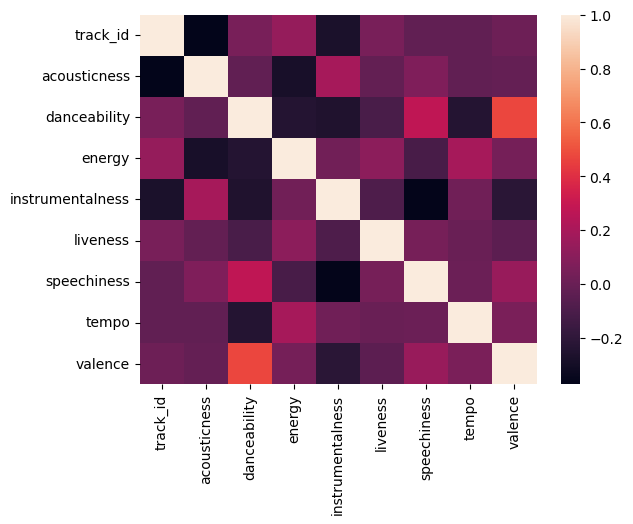

In [9]:
corr_metrics = etracks.corr()
sns.heatmap(corr_metrics)

In [10]:
# Define our features 
features = etracks.drop(['track_id', 'genre_top'], axis=1)

# Define our labels
labels = etracks['genre_top']

In [12]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

Text(0.5, 0, 'PC #')

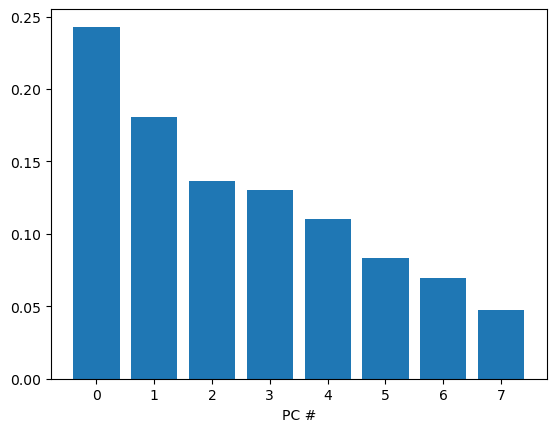

In [14]:
pca = PCA()
pca.fit(scaled_train_features)
explained_variance_ratio= pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), explained_variance_ratio)
ax.set_xlabel('PC #')

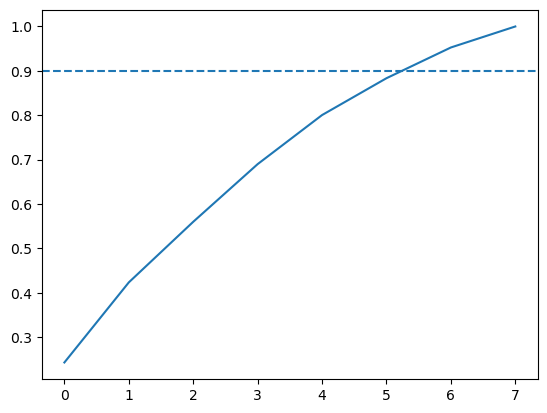

In [22]:
cumm_explained_variance_ratio = np.cumsum(explained_variance_ratio)

fig, ax = plt.subplots()
ax.plot(cumm_explained_variance_ratio)
ax.axhline(y=0.9, linestyle='dashed')
n_components = 6

pca = PCA(n_components)
pca.fit(features)
pca_projection = pca.transform(features)

In [27]:
#train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels)
X_train,X_test,y_train,y_test= train_test_split(pca_projection, labels)                                                                                                                                               
# Train our decision tree
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

# Predict the labels for the test data
Dtree_pred = tree.predict(X_test)
tree.score(X_test,y_test)

0.9641965029142381

In [30]:
Dtree_report = classification_report(y_test, Dtree_pred)
print(Dtree_report)

              precision    recall  f1-score   support

     Hip-Hop       0.91      0.91      0.91       235
        Rock       0.98      0.98      0.98       966

    accuracy                           0.96      1201
   macro avg       0.94      0.94      0.94      1201
weighted avg       0.96      0.96      0.96      1201

